<a href="https://colab.research.google.com/github/cedricxs/MYPY/blob/master/TP1_Extraction_de_connaissances_dans_les_donn%C3%A9es_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Fonctions basiques de pandas

Dans ce TP, nous allons étudier le jeu de données german.data qui décrit des prêts accordés par une banque allemande. Chaque ligne correspond à un prêt.


In [0]:
import pandas
df = pandas.read_csv("/content/drive/My Drive/INFO 4/Extraction de connaissances dans les données/TP1/german.data", sep="\t")

Kit de survie pour utiliser pandas :

```
import pandas
df = pandas.read_csv("german.data", sep="\t")
df.dtypes
df.shape
df.count()
df.describe()
```

Les colonnes sont stockées dans des Series

Les tableaux de données sont stockés dans des Dataframe

Accès aux noms des lignes : `df.index`

Accès aux noms des colonnes : `df.columns`

Accès à une ligne : `df.iloc[i,:]` ou `df.iloc[i]`

Accès à une colonne : `df.iloc[:,j]`


Afin d'accéder aux types des colonnes, on utilise `df.dtypes`



In [0]:
df.dtypes

checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment    float64
personal_status            object
other_parties              object
residence_since           float64
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits          float64
job                        object
num_dependents            float64
own_telephone              object
foreign_worker             object
class                       int64
dtype: object

Pour avoir accès à la dimensuion des données, on utilise `df.shape`

In [0]:
df.shape

(1000, 21)

Pour avoir accès au nombre de données par colonnes, on utilise `df.count()`

In [0]:
df.count()



checking_status           1000
duration                  1000
credit_history            1000
purpose                   1000
credit_amount             1000
savings_status            1000
employment                1000
installment_commitment    1000
personal_status           1000
other_parties             1000
residence_since           1000
property_magnitude        1000
age                       1000
other_payment_plans       1000
housing                   1000
existing_credits          1000
job                       1000
num_dependents            1000
own_telephone             1000
foreign_worker            1000
class                     1000
dtype: int64

Afin d'accéder à une description de nos données, on peut utiliser `df.describe()`

In [0]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


# 2. Visualisation de nos données

**Intéressons nous à la variable duration**

Traçons l'histogramme de la variable duration :

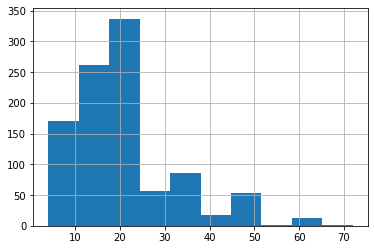

In [0]:
df.duration.hist()

Traçons maintenant la boîte à moustache de notre varaible duration :

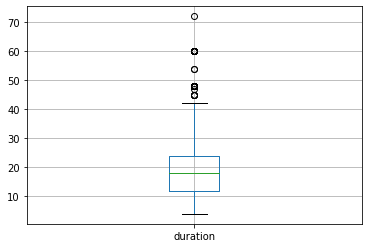

In [0]:
df.boxplot("duration")

**Intéressons nous à la variable purpose**

Traçons le diagramme en secteur de la variable purpose :

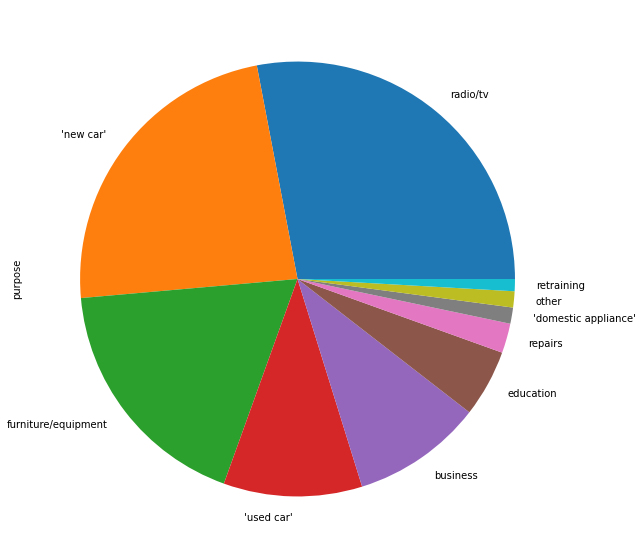

In [0]:
df.purpose.value_counts().plot.pie(figsize=[10,10])

# 3. Transformation des nos variables pour scikit-learn

Importons le module `mca.py` :

In [0]:
files.upload()

Saving mca2.py to mca2 (1).py


{'mca2.py': b'# -*- coding: utf-8 -*-\n\nimport scipy.linalg, numpy, pandas, functools\n\n# import pdb\n\ndef dummy(DF, cols=None):\n\t"""Dummy code select columns of a DataFrame."""\n\treturn pandas.concat((pandas.get_dummies(DF[col]) for col in (DF.columns if cols is None else cols)), \n\t\t\t\t\t\taxis=1, keys = DF.columns)\n\ndef _mul(*args):\n\t"""An internal method to multiply matrices."""\n\treturn functools.reduce(numpy.dot, args)\n\nclass mca:\n\t"""Run MCA on selected columns of a pandas DataFrame. \n\tIf the column are specified, assume that they hold \n\tcategorical variables that need to be replaced with\n\tdummy indicators, otherwise process the DataFrame as is.\n\n\t\'cols\': The columns of the DataFrame to process.\n\t\'K\': The number of columns before dummy coding. To be passed if cols isn\'t.\n\t\'benzecri\': Perform Benz\xc3\xa9cri correction (default: True)\n\t\'TOL\': value below which to round eigenvalues to zero\n\t"""\n\n\tdef __init__(self, DF, cols=None, ncol

In [0]:
from mca2 import *

On effectue un codage disjonctif complet à l'aide de `pandas.get_dummies`

In [0]:
dfbin = pandas.get_dummies(df.iloc[:,:20])  # Pour binariser les variables catégoriques
dfbin.shape

(1000, 61)

In [0]:
dfbin.dtypes

duration                  float64
credit_amount             float64
installment_commitment    float64
residence_since           float64
age                       float64
                           ...   
job_skilled                 uint8
own_telephone_none          uint8
own_telephone_yes           uint8
foreign_worker_no           uint8
foreign_worker_yes          uint8
Length: 61, dtype: object

In [0]:
dfmca=mca(dfbin, benzecri=False) # On fait l'ACM

Appliquons ensuite une analyse des correspondances multiples :

In [0]:
nouvellesCoordonnees=dfmca.fs_r(N=61) # 61 correspond au nombre de modalités moins le nombre de variables
nouvellesCoordonnees.shape

(1000, 45)

Mais en faisant cela, on perd en explicabilité du modèle. On remplace des variables catégoriques qui ont du sens par des varaibles numériques qui n'ont pas de sens. Donc on aura aucune chance de pouvoir interpréter le modèle de prédiction, même un modèle lisible comme un arbre de décision
ou alors il essayer de donner du sens aux 45 variables ! La philosophie de Scikit-learn est plus de faire des modèles que de les comprendre.

ACM = Analyse en composantes multiples

# 4. Construction des modèles

Importons maintenant Scikit-learn et construisons plusieurs modèles pour prédire la variable *class* à l'aide de différents algorithmes d'apprentissage

In [0]:
import sklearn

Définissons également les varaibles sur lesquelles nous allons travailler :

In [0]:
y = df.iloc[:,-1] # target class
X = nouvellesCoordonnees

Séparaons maintenant notre jeu de données en deux parties afin d'avoir un jeu de données réservé à l'apprentissage (train) et un autre réservé à la validation (test).

In [0]:
Xtrain, Xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X, y, train_size = 0.8)

Importons également matplotlib afin de visualiser nos modèles

In [0]:
import matplotlib.pyplot as plt

## **Arbre de décision**

[]

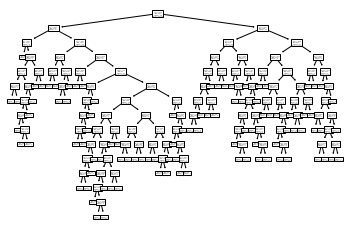

In [0]:
decisionTree = sklearn.tree.DecisionTreeClassifier()

decisionTree.fit(Xtrain, ytrain)

plot_tree(decisionTree)
plt.plot()

## **K plus proches voisins**

In [0]:
kneighbors = sklearn.neighbors.KNeighborsClassifier()
kneighbors.fit(Xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## **Régression logistique**

In [0]:
logisticRegression = sklearn.linear_model.LogisticRegression()
logisticRegression.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## **Forêts aléatoires**

In [0]:
randomForests = sklearn.ensemble.RandomForestClassifier()
randomForests.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## **SVM**

In [0]:
svm = sklearn.svm.SVC()
svm.fit(Xtrain, ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# 5. Evaluation des modèles

Evaluons maintenant nos algorithmes à l’aide d’une validation simple puis d’une validation croisée


## **Arbre de décision**

Validation simple


In [0]:
decisionTree.score(Xtest, ytest)

0.625

Validation croisée

In [0]:
sklearn.model_selection.cross_val_score(decisionTree, Xtest, ytest)

array([0.6  , 0.7  , 0.6  , 0.725, 0.6  ])

## **K plus proches voisins**

Validation simple


In [0]:
kmeans.score(Xtest, ytest)

0.68

Validation croisée

In [0]:
sklearn.model_selection.cross_val_score(kmeans, Xtest, ytest)

array([0.775, 0.675, 0.65 , 0.6  , 0.675])

## **Régression logistique**

Validation simple


In [0]:
logisticRegression.score(Xtest, ytest)

0.69

Validation croisée

In [0]:
sklearn.model_selection.cross_val_score(logisticRegression, Xtest, ytest)

array([0.7  , 0.675, 0.675, 0.675, 0.675])

## **Forêts aléatoires**

Validation simple


In [0]:
randomForests.score(Xtest, ytest)

0.715

Validation croisée

In [0]:
sklearn.model_selection.cross_val_score(randomForests, Xtest, ytest)

array([0.7  , 0.725, 0.7  , 0.65 , 0.6  ])

## **SVM**

Validation simple


In [0]:
svm.score(Xtest, ytest)

0.705

Validation croisée

In [0]:
sklearn.model_selection.cross_val_score(svm, Xtest, ytest)

array([0.725, 0.7  , 0.675, 0.675, 0.65 ])

# 6. Qualité des modèles en fonction de la complexité

Observons maintenant l'évolution de la qualité de nos modèles en fonction de leur complexité :

Pour la complexité :

Pour la régression logistique (classe LogisticRegression), le paramètre de complexité est C. Attention c'est une échelle logarithmique, il peut prendre de très grandes valeurs comme très petites (mais tjs positives)

Pour les classifieurs SVM (classe SVC), le paramètre s'appelle C aussi (grandes valeurs aussi)

Pour les k plus proches voisins (KNeighborsClassifier), je vous laisse trouver le paramètre !

## **Arbre de décision**

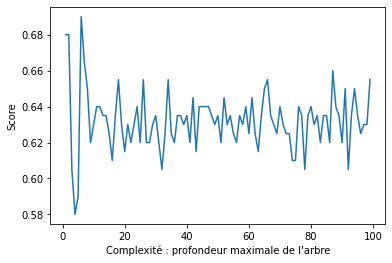

In [0]:
complexities = []

for d in range(1,100):
  decisionTree = sklearn.tree.DecisionTreeClassifier(max_depth=d)
  decisionTree.fit(Xtrain, ytrain)
  complexities.append(decisionTree.score(Xtest, ytest))

plt.plot(range(1,100),complexities)
plt.xlabel("Complexité : profondeur maximale de l'arbre")
plt.ylabel("Score")

plt.show()

## **K plus proches voisins**

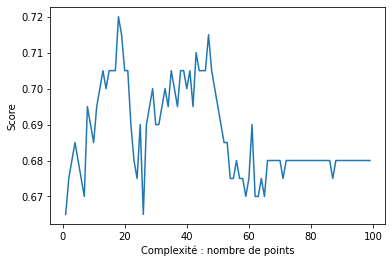

In [0]:
complexities = []

for n in range(1,100):
  kneighbors = sklearn.neighbors.KNeighborsClassifier(n_neighbors=n)
  kneighbors.fit(Xtrain, ytrain)
  complexities.append(kneighbors.score(Xtest, ytest))

plt.plot(range(1,100),complexities)
plt.xlabel("Complexité : nombre de points")
plt.ylabel("Score")

plt.show()

## **Régression logistique**

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


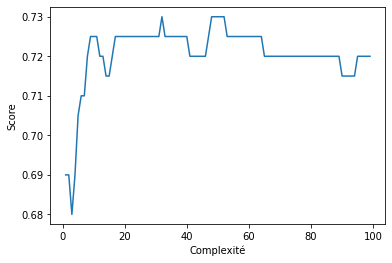

In [0]:
complexities = []

for c in range(1,100):
  logisticRegression = sklearn.linear_model.LogisticRegression(C=c)
  logisticRegression.fit(Xtrain, ytrain)
  complexities.append(logisticRegression.score(Xtest, ytest))

plt.plot(range(1,100),complexities)
plt.xlabel("Complexité")
plt.ylabel("Score")

plt.show()

## **Forêts aléatoires**

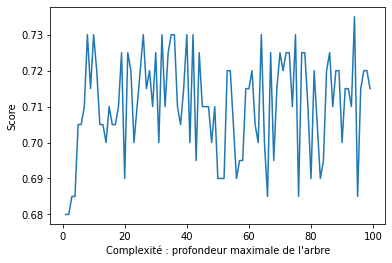

In [0]:
complexities = []

for d in range(1,100):
  randomForests = sklearn.ensemble.RandomForestClassifier(max_depth=d)
  randomForests.fit(Xtrain, ytrain)
  complexities.append(randomForests.score(Xtest, ytest))

plt.plot(range(1,100),complexities)
plt.xlabel("Complexité : profondeur maximale de l'arbre")
plt.ylabel("Score")

plt.show()

## **SVM**

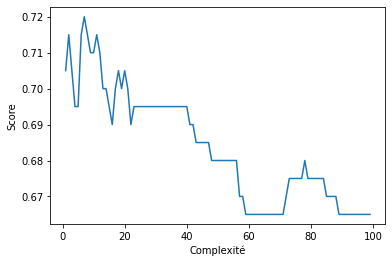

In [0]:
complexities = []

for c in range(1,100):
  svm = sklearn.svm.SVC(C=c)
  svm.fit(Xtrain, ytrain)
  complexities.append(svm.score(Xtest, ytest))

plt.plot(range(1,100),complexities)
plt.xlabel("Complexité")
plt.ylabel("Score")

plt.show()